In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
#transpose matrix to have sample as row, gene in column
LumB_transpose = pd.read_csv(r"C:\Users\javte\Documents\SSEF project\datasets\full_matrix\matrix_logCPMrmBatch_20221207.csv", index_col=[0])
LumB = LumB_transpose.transpose()


In [3]:
LumB.head(10)

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288598.1,ENSG00000288600.1,ENSG00000288605.1,ENSG00000288611.1,ENSG00000288612.1,ENSG00000288658.1,ENSG00000288663.1,ENSG00000288670.1,ENSG00000288674.1,ENSG00000288675.1
TCGA-AC-A8OP-01A-11R-A36F-07,4.334556,0.338276,5.132959,4.676303,2.458902,2.402779,4.753039,5.137244,5.498365,5.725914,...,-1.370926,-4.765063,-2.787367,-2.452800,-1.223324,-0.909768,0.080492,2.257035,-2.635427,-1.739484
TCGA-D8-A1XU-01A-11R-A14M-07,6.336225,-2.529474,5.602467,4.319339,2.459548,2.627420,5.093723,6.128477,3.379453,4.746694,...,-1.619492,-4.403619,-4.124473,-2.849692,-1.524745,-2.753690,-0.438234,2.547337,-2.134640,-0.338258
TCGA-BH-A18L-01A-32R-A12D-07,3.813323,-1.401063,5.565715,5.552412,4.027561,2.068734,4.506864,4.995137,6.051037,4.901071,...,-1.772206,-3.103419,-4.402460,-4.141149,0.094590,-0.997084,-1.285545,3.405424,-2.876473,-3.467314
TCGA-B6-A0IK-01A-12R-A056-07,3.286383,-1.128756,5.619653,4.380872,2.936265,2.272899,4.868725,6.263245,4.726361,5.432736,...,-1.870528,-3.869401,-4.246162,-2.853896,-0.484253,-2.342148,-1.807604,1.726225,-3.081476,0.310510
TCGA-BH-A18L-11A-42R-A12D-07,6.045874,5.275122,4.736844,4.097760,1.781595,3.652715,7.783962,5.549929,5.483536,4.849457,...,-0.785797,-4.696654,-0.806703,-4.730254,0.256799,-2.351154,-0.742799,2.425229,-2.027311,-1.763284
TCGA-BH-A0B1-01A-12R-A056-07,5.941381,-3.192086,5.281138,4.673511,3.677499,1.994647,6.233779,5.470032,5.994051,5.963254,...,-1.953279,-3.348569,-2.164418,3.865524,-1.490993,-2.812540,-1.586245,3.085475,-2.600727,-2.117306
TCGA-A8-A06Q-01A-11R-A034-07,3.323541,-3.253994,5.770420,5.383362,3.941965,1.130887,3.821800,6.072204,3.850053,5.694257,...,-1.670961,-4.684145,-4.079628,-1.992331,-0.399617,-4.883587,-0.740439,3.636666,-2.720115,-1.392050
TCGA-D8-A27R-01A-11R-A16F-07,5.544895,-1.609360,5.964415,4.125395,3.296232,2.371834,5.254653,5.567072,5.544990,5.640794,...,-1.961635,-3.251198,-4.721598,-1.166447,0.129647,-1.821303,-0.332820,2.765633,-2.555106,-1.781445
TCGA-E9-A22G-01A-11R-A157-07,6.921768,-3.171855,4.990301,5.195532,4.705928,2.391717,3.583524,5.580440,5.140992,7.212659,...,-1.376665,-3.422008,3.283424,-3.495349,-0.140576,0.665582,-1.754442,2.726433,-2.057346,-0.872842
TCGA-AO-A03N-01B-11R-A10J-07,5.087725,-4.778653,5.582393,3.946700,3.227663,1.574017,4.700746,5.919633,4.827015,6.064254,...,-1.008492,-4.981718,-4.483697,-4.491487,-0.229051,-4.745405,-1.836133,1.675912,-4.756210,1.017959


In [4]:
#PCA
pca = PCA()
principalComponents_LumB = pca.fit_transform(LumB)
principal_LumB_Df = pd.DataFrame(data = principalComponents_LumB
             , columns = ["PC"+str(i) for i in range(1, len(principalComponents_LumB)+1)])
principal_LumB_Df.shape

(1190, 1190)

In [9]:
# Take pam50 column from metadata and set as index of PCA dataframe
unsorted_metadata = pd.read_csv(r"C:\Users\javte\Documents\SSEF project\datasets\Normalized expression data set\metadata\selected_metadat_20221128.csv")
LumB_pam50 = unsorted_metadata[('pam50')].to_list()
principal_LumB_Df['pam50'] = LumB_pam50
principal_LumB_Df.set_index('pam50', drop = True, inplace = True)
principal_LumB_Df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC1181,PC1182,PC1183,PC1184,PC1185,PC1186,PC1187,PC1188,PC1189,PC1190
pam50,,,,,,,,,,,,,,,,,,,,,
LumA,-41.529531,-35.536286,12.820059,-31.484378,19.773817,-32.513670,-4.087454,-12.634166,-11.718744,-6.817890,...,2.317989e-17,3.358545e-17,5.791703e-16,1.649077e-16,1.207842e-16,-1.224818e-16,3.793034e-16,3.727336e-16,1.824823e-16,3.243241e-16
LumA,-30.849645,-34.885648,-19.948258,-5.818903,-26.342348,-5.443753,0.730816,-9.501544,5.442128,40.762212,...,-6.188178e-17,3.673932e-16,-6.489524e-17,1.087702e-16,-2.094850e-16,3.788234e-17,-2.426625e-16,3.644510e-17,1.759674e-17,1.555889e-16
LumB,-78.418226,19.854948,15.898853,-12.680845,79.478587,1.994222,25.558334,-29.147747,24.209838,0.610121,...,1.568932e-15,8.630758e-16,-6.422278e-15,2.975092e-15,3.715463e-15,7.718440e-15,-4.805060e-15,-5.093584e-16,-5.498445e-15,-1.295594e-15
Her2,-0.647158,44.671889,-17.422569,19.704628,-23.101095,1.089484,50.680032,-16.956449,24.462791,14.496685,...,1.291410e-15,2.931907e-15,-5.600847e-15,-1.360095e-15,-3.764622e-16,-4.055161e-16,1.815167e-15,2.982956e-15,2.053144e-15,9.697177e-16
Healthy,120.544090,-103.044179,26.564522,21.747705,16.296654,20.622125,3.055648,-7.060247,-1.653002,25.058082,...,-5.550099e-15,1.110147e-14,3.710228e-15,-5.997150e-15,5.095338e-15,7.849914e-15,-2.757180e-15,-4.197865e-15,-3.942240e-15,-7.379722e-16


<Figure size 640x480 with 0 Axes>

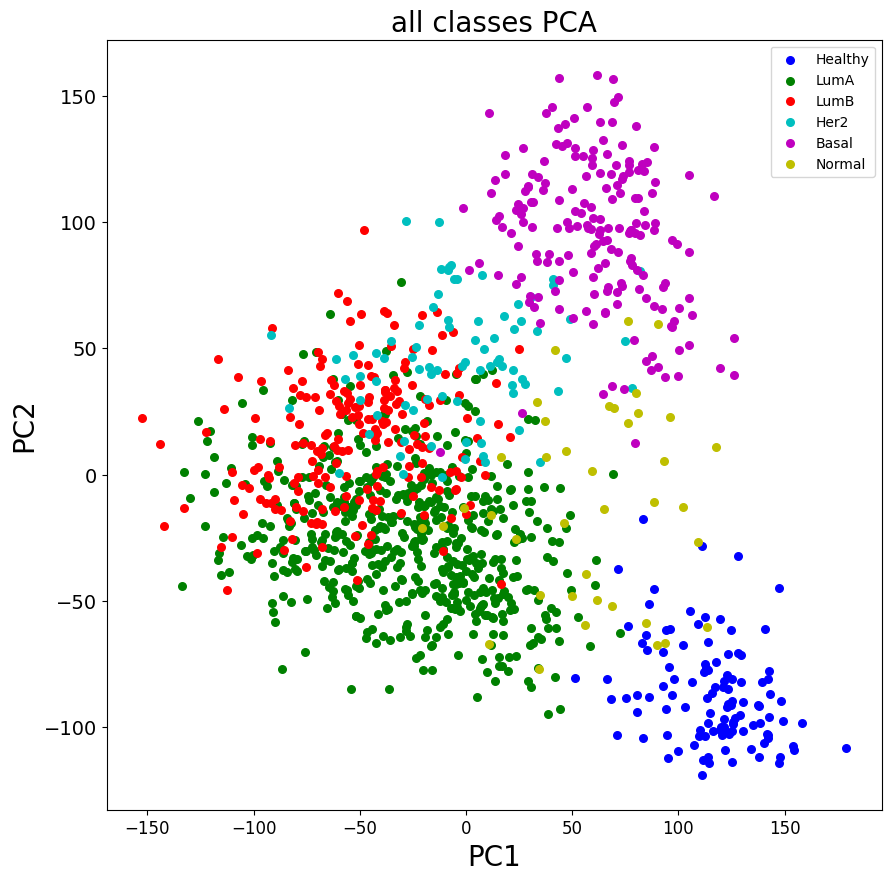

In [8]:
#formatting plot
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.title("all classes PCA",fontsize=20)
targets = ['Healthy', 'LumA', 'LumB', 'Her2', 'Basal', 'Normal']
colours = ['b', 'g', 'r', 'c', 'm', 'y']
#colour code points according to pam50
for target, colour in zip(targets,colours):
    index = principal_LumB_Df.index == target
    plt.scatter(principal_LumB_Df.loc[index, 'PC1']
               , principal_LumB_Df.loc[index, 'PC2'], c = colour, s = 30)
#plot legend
plt.legend(targets,prop={'size': 10})

Text(0, 0.5, 'explained variance (%)')

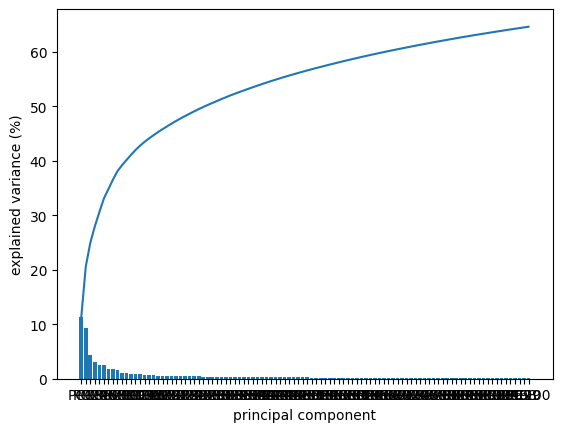

In [13]:
import matplotlib.pyplot as plt
#no. of PCs to be visualised
n = 100
plt.bar(x=principal_LumB_Df.columns[:n], height = 100*pca.explained_variance_ratio_[:n])
cumulative = np.cumsum(100*pca.explained_variance_ratio_[:n])
plt.plot(principal_LumB_Df.columns[:n], cumulative)
plt.xlabel('principal component')
plt.ylabel('explained variance (%)')

In [ ]:
total=0
for var in pca.explained_variance_ratio_[:100]:
    total+= var
print('First 100 PC accounts for '+str('{0:.3g}'.format(100*total))+'% of variance')